# Michelle pH dependent experiment

Electrode A (old)
1mM total Cu
1e-5 EN


"1mM Cu static.xlsx"

In [28]:
% housekeeping
% clear data and number format
clear; format short e
% turn off warnings
warning off
graphics_toolkit ("notebook"); 
%graphics_toolkit ("plotly"); 
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt(1:n-12);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB']; addpath(JEQUILIBpath);
Cumodelspath=[rootpath,'/Cu_EN']; addpath(Cumodelspath);

In [29]:
% put in constants
%stockCuconc=0.0133; %M
VT=0.05; %total volume
stockCuconc=0.157366; %M
ENT=1e-5;

In [37]:
% put in data

originalsamplemVnpH=[...
%pH mV
9.349 -131.1
8.428 -90.3
6.703 -5.7
3.337 71.1
2.164 63.1
];

calibdata=[...
%volCu mV pH
0  63.1 2.164
0  63.1 2.164
];


pHv,1
1,9.349
2,8.428
3,6.703
4,3.337
5,2.164


CuTplus,1,2
1,1e-06,1e-06


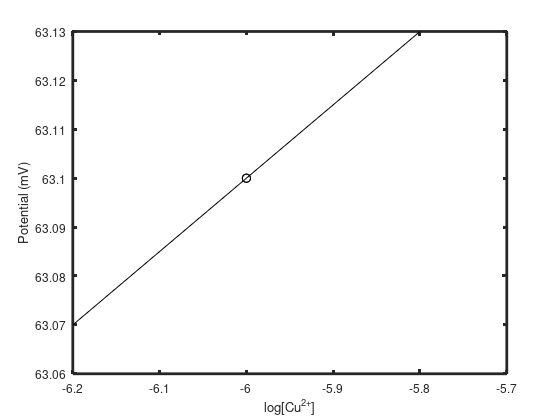

In [31]:
graphics_toolkit("notebook")
% pull out the sample data
pHv=(originalsamplemVnpH(:,1))
mVoriginal=(originalsamplemVnpH(:,2));

%pull out the calibration data
addedCuvol=calibdata(:,1)'*1e-6; pHcalib=calibdata(:,3); mV=calibdata(:,2)'; 
CuTmeas=1e-6; % not actually known until it is measured 
CuT=CuTmeas; CuTplus=(CuTmeas*(VT)+addedCuvol*stockCuconc)./(VT+addedCuvol)

plot(log10(CuTplus),mV,'ko'); hold on

%chlorocorrecxtion
%BF1=2.49; BF2=1.14; BF3=0.9; ClT=4.9904e-4; %from Inorg. Chem. 1983. 22. 3323-3326.
%CuTplus=CuTplus./(1+BF1*ClT+BF2*ClT^2+BF3*ClT^3);

%determine all the slopes and intercepts for each pair of mV values
for i=1:length(mV)-1
    param=polyfit([log10(CuTplus(i)) log10(CuTplus(i+1))],[mV(i) mV(i+1)],1);
    val=polyval(param,[log10(CuTplus(i))-0.2 log10(CuTplus(i+1))+0.2]);
    plot([log10(CuTplus(i))-0.2 log10(CuTplus(i+1))+0.2],val,'k-')
    m(i)=param(1); Eo(i)=param(2); 
    %two ways to define what logCu is for the Eo and m values. need to pick the approach that consistently works best
    logCuT(i)=mean([log10(CuTplus(i)) log10(CuTplus(i+1))]); % calib Cu is the midpoint
    %logCuT(i)=[log10(CuTplus(i))]; % calib Cu is the starting point 
end
xlabel('log[Cu^{2+}]');  ylabel('mV');
set(gca,'fontsize',12); set(gca,'linewidth',2);
xlabel('log[Cu^{2+}]'); ylabel('Potential (mV)')

In [32]:
% then use this metacalibration to determine original sample logCu2+

Eooriginal=mean(Eo(1)); 
moriginal=mean(m(1)); 

moriginalsimple=59.2/2; Eooriginalsimple=mV(1)-moriginalsimple*log10(CuTmeas);

logCuoriginal=(mVoriginal-Eooriginal)/moriginal;
logCuoriginalsimple=(mVoriginal-Eooriginalsimple)/moriginalsimple

logCuoriginalsimple,1
1,-12.5608
2,-11.1824
3,-8.32432
4,-5.72973
5,-6


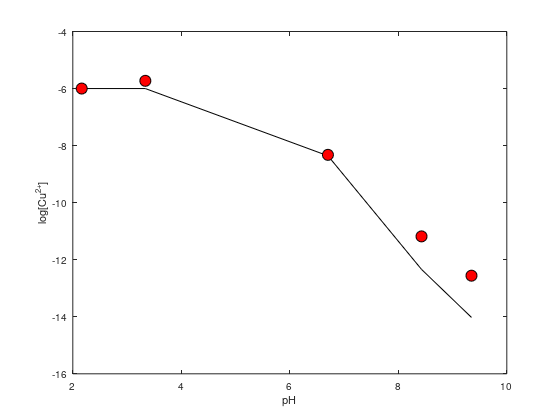

ans,1,2,3,4,5
1,-14.0232,-12.3392,-8.35787,-6.00004,-6


In [33]:
% MODEL FOR COMPARISON
graphics_toolkit("notebook")
%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry

flag1=2; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=1; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
database=[]; 
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=0; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

CuT=CuTmeas; inorganicTOTALS=[CuT ENT];
inorganicTOTALS(inorganicTOTALS==0)=1e-16; % get rid of zero values, b/c div by zero error
TOTALS=[inorganicTOTALS]; %TOTALS=inorganicTOTALS;

for i=1:length(pHv);
    pH=pHv(i); pe=20.75-pH; PCO2=10^-3.5;
    [Cuall(i),CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2open_EN_allsolids(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);
end

%plot(pHv,logCuoriginal,'bo','markersize',8,'markerfacecolor','b'); 
%hold on
plot(pHv,log10(Cuall),'k-')
hold on
plot(pHv,logCuoriginalsimple,'ko','markersize',8,'markerfacecolor','r'); 

log10(Cuall)

xlabel('pH'); ylabel('log[Cu^{2+}]')

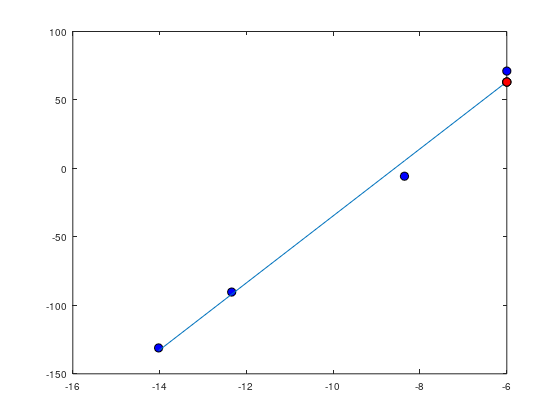

param,1,2
1,24.4829,210.189


In [34]:
% compare mV measured to modeled log Cu

plot(log10(Cuall),mVoriginal,'ko','markerfacecolor','b')
param=polyfit(log10(Cuall),mVoriginal,1)

fit=polyval(param,log10(Cuall));

hold on 

plot(log10(Cuall),fit)

plot([log10(CuTplus)],mV,'ko','markerfacecolor','r')

In [35]:
log10(Cuall)
mVoriginal
logCuoriginal
logCuoriginalsimple

ans,1,2,3,4,5
1,-14.0232,-12.3392,-8.35787,-6.00004,-6


mVoriginal,1
1,-131.1
2,-90.3
3,-5.7
4,71.1
5,63.1


logCuoriginal,1
1,-1300.67
2,-1028.67
3,-464.667
4,47.3333
5,-6


logCuoriginalsimple,1
1,-12.5608
2,-11.1824
3,-8.32432
4,-5.72973
5,-6
